## RTWP Clustering 
#### This code is to be used for the purpose of categorizing internal and external interference on cells.
#### Two algorithms are employed ie DBSCAN and HDSCAN

In [14]:
import pyodbc
import pandas as pd

In [15]:
#Logging in to db
import pyodbc

conn = pyodbc.connect(

    r'DRIVER={ODBC Driver 13 for SQL Server};'+

    ('SERVER={server},{port};'   +

     'DATABASE={database};'      +

     'UID={username};'           +

     'PWD={password}').format(

            server= '10.184.38.155',

              port= 1433,

          database= 'KPI_Huawei',

          username= 'temp',

          password= 'temp'))


InterfaceError: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')

In [ ]:
#Querying Huawei RWTP
import pandas as pd
Huawei_RTWP=pd.read_sql_query("Select t1.did, t1.MeanRTW  as 'RTWP' ,count(t2.did) as 'Days'from [KPI_Huawei_NE].[kpi].[UMTS_Main_KPIs_CS_BH] t1 inner join [KPI_Huawei].[kpi].[UMTS_Main_KPIs_CS_BH]  as t2 on (t2.did=t1.did)where convert(DATE,t1.starttime) = convert(DATE,GETDATE()-1) and  t1.MeanRTW > -90and t2.MeanRTW> -90 group by t1.[did],t1.MeanRTW",conn)

In [ ]:
#Logging in to db
import pyodbc

conn = pyodbc.connect(

    r'DRIVER={ODBC Driver 13 for SQL Server};'+

    ('SERVER={server},{port};'   +

     'DATABASE={database};'      +

     'UID={username};'           +

     'PWD={password}').format(

            server= '10.184.38.155',

              port= 1433,

          database= 'KPI_Nokia',

          username= 'temp',

          password= 'temp'))

In [ ]:
#Querying Nokia RTWP
Nokia_RTWP=pd.read_sql_query("Select t1.did,10*log( case when sum(t1.[Average_RTWP_DENOM]) = 0 then null else sum(t1.[Average_RTWP_NOM])/sum(t1.[Average_RTWP_DENOM]) end ,10)  as 'RTWP' ,count(t2.did) as 'Days'from [KPI_Nokia].[kpi].[UMTS_Main_KPIs_CS_BH] t1 inner join [KPI_Nokia].[kpi].[UMTS_Main_KPIs_CS_BH]  as t2 on (t2.did=t1.did) where   convert(DATE,t1.starttime) = convert(DATE,GETDATE()-1) and  10*log( case when (t1.[Average_RTWP_DENOM]) = 0 then null else (t1.[Average_RTWP_NOM])/(t1.[Average_RTWP_DENOM]) end ,10) > -90 and 10*log( case when (t2.[Average_RTWP_DENOM]) = 0 then null else (t2.[Average_RTWP_NOM])/(t2.[Average_RTWP_DENOM]) end ,10) > -90 group by t1.[did]",conn)

In [ ]:
Huawei_RTWP.head()

In [16]:
Nokia_RTWP.head()

NameError: name 'Nokia_RTWP' is not defined

In [5]:
#Combining Huawei and Nokia RTWP
data =pd.concat([Huawei_RTWP,Nokia_RTWP], ignore_index=True)

NameError: name 'pd' is not defined

In [6]:
data.head()

NameError: name 'data' is not defined

## Loading

In [7]:
#logging in to .184 to get Huawei load
import pyodbc

conn = pyodbc.connect(

    r'DRIVER={ODBC Driver 13 for SQL Server};'+

    ('SERVER={server},{port};'   +

     'DATABASE={database};'      +

     'UID={username};'           +

     'PWD={password}').format(

            server= '10.197.4.184',

              port= 1433,

          database= 'Z_BH_Huawei_Counters',

          username= 'mnmureithi',

          password= 'Capri Italy@2019'))

InterfaceError: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')

In [8]:
# Huawei load
Huawei_load=pd.read_sql_query("select * from (select Vendor, starttime,did,TCPload,ROW_NUMBER() OVER (PARTITION BY did ORDER BY TCPload desc  ) as row_num1 from (select Vendor, starttime,did,TCPload,row_num from(select Vendor, starttime,did,TCPload,ROW_NUMBER() OVER ( PARTITION BY did ORDER BY TCPload) row_num from (select 'Huawei' as 'Vendor' , starttime,did, case when (([VS.TCP.0]+[VS.TCP.1]+[VS.TCP.2]+[VS.TCP.3]+[VS.TCP.4]+[VS.TCP.5]+[VS.TCP.6]+[VS.TCP.7]+[VS.TCP.8]+[VS.TCP.9]+[VS.TCP.10]+[VS.TCP.11]+[VS.TCP.12]+[VS.TCP.13]+[VS.TCP.14]+[VS.TCP.15]+[VS.TCP.16]+[VS.TCP.17]+[VS.TCP.18]+[VS.TCP.19]))=0 then null else (+((7.5)*[VS.TCP.1])+((12.5)*[VS.TCP.2])+((17.5)*[VS.TCP.3])+((22.5)*[VS.TCP.4])+((27.5)*[VS.TCP.5])+((32.5)*[VS.TCP.6])+((37.5)*[VS.TCP.7])+((42.5)*[VS.TCP.8])+((47.5)*[VS.TCP.9])+((52.5)*[VS.TCP.10])+((57.5)*[VS.TCP.11])+((62.5)*[VS.TCP.12])+((67.5)*[VS.TCP.13])+((72.5)*[VS.TCP.14])+((77.5)*[VS.TCP.15])+((82.5)*[VS.TCP.16])+((87.5)*[VS.TCP.17])+((92.5)*[VS.TCP.18])+((97.5)*[VS.TCP.19]))/(([VS.TCP.0]+[VS.TCP.1]+[VS.TCP.2]+[VS.TCP.3]+[VS.TCP.4]+[VS.TCP.5]+[VS.TCP.6]+[VS.TCP.7]+[VS.TCP.8]+[VS.TCP.9]+[VS.TCP.10]+[VS.TCP.11]+[VS.TCP.12]+[VS.TCP.13]+[VS.TCP.14]+[VS.TCP.15]+[VS.TCP.16]+[VS.TCP.17]+[VS.TCP.18]+[VS.TCP.19]))end as TCPload from Z_BH_Huawei_Counters.rnc.U_TX_RX_Power )u)h where  row_num > '4')  y)i where row_num1 > '4' ",conn)

NameError: name 'pd' is not defined

In [9]:
Huawei_load.columns

NameError: name 'Huawei_load' is not defined

In [10]:
Huawei_load=Huawei_load[['Vendor',  'did', 'TCPload']]

NameError: name 'Huawei_load' is not defined

In [11]:
#logging in to .184 to get Nokia load
import pyodbc

conn = pyodbc.connect(

    r'DRIVER={ODBC Driver 13 for SQL Server};'+

    ('SERVER={server},{port};'   +

     'DATABASE={database};'      +

     'UID={username};'           +

     'PWD={password}').format(

            server= '10.197.4.184',

              port= 1433,

          database= 'Z_BH_Nokia_Counters',

          username= 'mnmureithi',

          password= 'Capri Italy@2019'))

InterfaceError: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')

In [12]:
Nokia_load=pd.read_sql_query("select * from (select Vendor, starttime,did,TCPload,ROW_NUMBER() OVER (PARTITION BY did ORDER BY TCPload desc  ) as row_num1 from (select Vendor, starttime,did,TCPload,row_num from(select Vendor, starttime,did,TCPload,ROW_NUMBER() OVER ( PARTITION BY did ORDER BY TCPload) row_num from (SELECT 'Nokia' as 'Vendor' ,[Starttime],[did],CASE WHEN ([TX_CR_PWR_CLASS_0_M1000C342] + [TX_CR_PWR_CLASS_1_M1000C343] + [TX_CR_PWR_CLASS_2_M1000C344] + [TX_CR_PWR_CLASS_3_M1000C345] + [TX_CR_PWR_CLASS_4_M1000C346] + [TX_CR_PWR_CLASS_5_M1000C347]+ [TX_CR_PWR_CLASS_6_M1000C348] + [TX_CR_PWR_CLASS_7_M1000C349] + [TX_CR_PWR_CLASS_8_M1000C350] + [TX_CR_PWR_CLASS_9_M1000C351] + [TX_CR_PWR_CLASS_10_M1000C352])= 0 THEN Null ELSE (13.58391486*[TX_CR_PWR_CLASS_5_M1000C347]+31.96693704*[TX_CR_PWR_CLASS_6_M1000C348] + 48.63360371*[TX_CR_PWR_CLASS_7_M1000C349] + 61.74514484*[TX_CR_PWR_CLASS_8_M1000C350] + 72.85625595*[TX_CR_PWR_CLASS_9_M1000C351] + 91.36169264*[TX_CR_PWR_CLASS_10_M1000C352])/([TX_CR_PWR_CLASS_0_M1000C342] + [TX_CR_PWR_CLASS_1_M1000C343] + [TX_CR_PWR_CLASS_2_M1000C344] + [TX_CR_PWR_CLASS_3_M1000C345] + [TX_CR_PWR_CLASS_4_M1000C346] + [TX_CR_PWR_CLASS_5_M1000C347]+ [TX_CR_PWR_CLASS_6_M1000C348] + [TX_CR_PWR_CLASS_7_M1000C349] + [TX_CR_PWR_CLASS_8_M1000C350] + [TX_CR_PWR_CLASS_9_M1000C351] + [TX_CR_PWR_CLASS_10_M1000C352]) end as TCPload FROM [Z_BH_Nokia_Counters].[nokrww].[Cell_Resource] )u)h where  row_num > '4')  y)i where row_num1 > '4' ",conn)

NameError: name 'pd' is not defined

In [13]:
Nokia_load=Nokia_load[['Vendor',  'did', 'TCPload']]

NameError: name 'Nokia_load' is not defined

In [16]:
load =pd.concat([Huawei_load,Nokia_load], ignore_index=True)

In [17]:
load.head()

,Vendor,did,TCPload
0,Huawei,48,55.464714
1,Huawei,48,54.469891
2,Huawei,48,53.194366
3,Huawei,48,52.961464
4,Huawei,48,48.371895


In [18]:
load=load.groupby('did', as_index=False)['TCPload'].mean()

In [19]:
data2=data.merge(load, on='did', how='inner')

In [20]:
data.shape

(1186, 3)

In [21]:
data2.shape

(1165, 4)

In [22]:
data2.head()

,did,RTWP,Days,TCPload
0,33424,-89.638504,3,80.618765
1,82028,-80.709999,35,65.414266
2,25440,-82.361000,35,82.886096
3,85405,-89.812500,35,31.338606
4,134807,-87.681999,28,50.297883


### Cell IDs

In [23]:
import pyodbc

conn = pyodbc.connect(

    r'DRIVER={ODBC Driver 13 for SQL Server};'+

    ('SERVER={server},{port};'   +

     'DATABASE={database};'      +

     'UID={username};'           +

     'PWD={password}').format(

            server= '10.184.38.155',

              port= 1433,

          database= 'KPI_Gids',

          username= 'temp',

          password= 'temp'))

In [24]:
Gids=pd.read_sql_query("SELECT [did], [Vendor], [Site_Name], [Cell_name], [Technology],[BAND], [LATITUDE], [LONGITUDE], [Region] FROM [KPI_Gids].[gid].[KPI_Cell_gids] ",conn)

In [25]:
Gids.head()

,did,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region
0,36855,Huawei,12001_NW_LNI10001-Safaricom_House_VIP_IBS,12001_NW_LNI10001-Safaricom_House_VIP-0,4G,LTE1800,-1.26123,36.798901,NAIROBI WEST
1,59013,Huawei,12001_NW_LNI10001-Safaricom_House_VIP_IBS,12001_NW_LNI10001-Safaricom_House_VIP-1,4G,LTE1800,-1.26123,36.798901,NAIROBI WEST
2,57707,Huawei,12001_NW_LNI10001-Safaricom_House_VIP_IBS,12001_NW_LNI10001-Safaricom_House_VIP-2,4G,LTE1800,-1.26123,36.798901,NAIROBI WEST
3,44668,Huawei,12001_NW_LNI10001-Safaricom_House_VIP_IBS,12001_NW_LNI10001-Safaricom_House_VIP-4,4G,LTE800,-1.26123,36.798901,NAIROBI WEST
4,53547,Huawei,12001_NW_LNI10001-Safaricom_House_VIP_IBS,12001_NW_LNI10001-Safaricom_House_VIP-5,4G,LTE800,-1.26123,36.798901,NAIROBI WEST


In [26]:
#Distance=pd.read_sql_query("SELECT t2.[cellName] as 'Cell_name' ,t2.[AZIMUTH],t3.[cellName] as 'T_Cell',t3.[AZIMUTH],[Distance] FROM [S-iSON].[gis].[Physical_Ids_Distance_Filtered] as t1 inner join [S-iSON].[gis].[All_Cells_Safaricom_Today] as t2 on t1.S_Physical_id=t2.Physical_id inner join [S-iSON].[gis].[All_Cells_Safaricom_Today] as t3 on t1.T_Physical_id=t3.Physical_id where Distance<1000 ",conn)

In [27]:
#Distance.head()

In [28]:
df=data2.merge(Gids, on='did', how='inner')
#df=data3.merge(Distance, on='Cell_name', how='inner')
#df.head()

In [29]:
#data3.head()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Data columns (total 12 columns):
did           1165 non-null int64
RTWP          1165 non-null float64
Days          1165 non-null int64
TCPload       1165 non-null float64
Vendor        1165 non-null object
Site_Name     1165 non-null object
Cell_name     1165 non-null object
Technology    1165 non-null object
BAND          1165 non-null object
LATITUDE      1161 non-null float64
LONGITUDE     1161 non-null float64
Region        1165 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 118.3+ KB


In [31]:
df.isnull().sum()

did           0
RTWP          0
Days          0
TCPload       0
Vendor        0
Site_Name     0
Cell_name     0
Technology    0
BAND          0
LATITUDE      4
LONGITUDE     4
Region        0
dtype: int64

In [32]:
df.describe()

,did,RTWP,Days,TCPload,LATITUDE,LONGITUDE
count,1165.000000,1165.000000,1165.000000,1165.000000,1161.000000,1161.000000
mean,72490.248069,-85.901779,18.826609,62.855575,-0.835394,36.611667
std,45957.725603,4.469183,11.972081,22.316507,1.304414,1.353861
min,35.000000,-89.997498,1.000000,0.000000,-4.595060,34.103100
25%,31791.000000,-88.893997,7.000000,42.570410,-1.285410,35.644100
50%,65593.000000,-87.385498,20.000000,67.102611,-1.238900,36.826599
75%,116766.000000,-84.219498,30.000000,82.061906,-0.313310,36.912399
max,156100.000000,-50.000000,35.000000,97.405392,5.016910,41.857101


In [33]:
df.isnull().sum()

did           0
RTWP          0
Days          0
TCPload       0
Vendor        0
Site_Name     0
Cell_name     0
Technology    0
BAND          0
LATITUDE      4
LONGITUDE     4
Region        0
dtype: int64

In [34]:
df[pd.isnull(df).any(axis=1)]

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region
163,132076,-85.587997,1,76.319269,Huawei,12463_MK_EC2030-Wamagana_OUTA_MGF,12463_MK_EC4030-Wamagana_OUTA_MGF_U900-0,3G,U900-C1,NaN,NaN,MT.KENYA
347,134742,-88.512497,26,34.511215,Huawei,12116_NW_NI2130-Dima_College_Micro_SWM,12116_NW_NI2130-Dima_College_Micro_SWM-0,3G,U2100-C1,NaN,NaN,NAIROBI WEST
753,134741,-87.611496,26,36.408575,Huawei,12116_NW_NI2130-Dima_College_Micro_SWM,12116_NW_NI2130-Dima_College_Micro_SWM-4,3G,U2100-C2,NaN,NaN,NAIROBI WEST
1135,137055,-83.625722,2,48.552484,Nokia,17402_WN_WL5959-Kisii_Daraja_Mbili_Market_MGF_...,17402_WN_WL3959-Kisii_Daraja_Mbili_Market_MGF-2,3G,U2100-C1,NaN,NaN,GREATER WESTERN


In [35]:
df['Site_Name'].isnull().sum()

0

In [36]:
df['Site_Name']=df['Site_Name'].fillna(df['Cell_name'].str[:-2])

In [37]:
df[pd.isnull(df).any(axis=1)]

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region
163,132076,-85.587997,1,76.319269,Huawei,12463_MK_EC2030-Wamagana_OUTA_MGF,12463_MK_EC4030-Wamagana_OUTA_MGF_U900-0,3G,U900-C1,NaN,NaN,MT.KENYA
347,134742,-88.512497,26,34.511215,Huawei,12116_NW_NI2130-Dima_College_Micro_SWM,12116_NW_NI2130-Dima_College_Micro_SWM-0,3G,U2100-C1,NaN,NaN,NAIROBI WEST
753,134741,-87.611496,26,36.408575,Huawei,12116_NW_NI2130-Dima_College_Micro_SWM,12116_NW_NI2130-Dima_College_Micro_SWM-4,3G,U2100-C2,NaN,NaN,NAIROBI WEST
1135,137055,-83.625722,2,48.552484,Nokia,17402_WN_WL5959-Kisii_Daraja_Mbili_Market_MGF_...,17402_WN_WL3959-Kisii_Daraja_Mbili_Market_MGF-2,3G,U2100-C1,NaN,NaN,GREATER WESTERN


In [38]:
df.dropna(inplace=True)
df.shape

(1161, 12)

In [39]:
df.isnull().sum()

did           0
RTWP          0
Days          0
TCPload       0
Vendor        0
Site_Name     0
Cell_name     0
Technology    0
BAND          0
LATITUDE      0
LONGITUDE     0
Region        0
dtype: int64

In [40]:
df['Load status']=df['TCPload'].apply(lambda x: 'heavy load' if x>=80 else ('medium load' if x>=50 else 'low load'))

In [41]:
Lamp=df[df['Cell_name'].str.contains('LAMP')]
Lamp.shape

(68, 13)

In [42]:
IBS=df[df['Cell_name'].str.contains('IBS')]
IBS.shape

(29, 13)

In [43]:
sites=df[~df['Cell_name'].str.contains('LAMP') & ~df['Cell_name'].str.contains('IBS')]
sites.shape

(1070, 13)

In [44]:
sites[sites['Load status']=='heavy load'].shape

(332, 13)

In [45]:
load=sites[sites['Load status']=='heavy load']

In [46]:
load.to_csv('D:\\work flow\\2019\\Nov\\overloaded_cells.csv')

In [47]:
sites=sites[sites['TCPload']<=80]

In [48]:
sites.sample(10)

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Load status
407,2332,-84.054504,9,38.205941,Huawei,12816_RV_WU4854-Kapsowar_OUTD_MGF,12816_RV_WU4854-Kapsowar_OUTD_U900-6,3G,U900-C2,0.951630,35.566601,RIFT,low load
436,152288,-88.623505,9,66.141670,Huawei,19233_MK_EU5515-Wajir_Halale_MGF_U900_NEW,19233_MK_EU5515-Wajir_Halale_MGF_U900_NEW-4,3G,U900-C2,1.753920,40.057800,MT.KENYA,medium load
126,116689,-78.925995,35,50.815886,Huawei,16514_NW_NI5278-Eastleigh_Kipande_Athumani_St_MRT,16514_NW_NI5278-Eastleigh_Kipande_Athumani_St_...,3G,U900-C2,-1.273470,36.847301,NAIROBI WEST,medium load
722,98004,-82.508499,35,35.292020,Huawei,12935_RV_WU4868-Tot_OUTN_MGF_U900,12935_RV_WU4868-Tot_OUTN_MGF_U900-4,3G,U900-C2,1.201890,35.656300,RIFT,low load
106,133694,-89.928001,14,46.209975,Huawei,13912_MK_EC4388-KATHATHANI_U900_OUTA_MGF,13912_MK_EC4388-KATHATHANI_U900_OUTA-6,3G,U900-C2,-0.372142,37.681400,MT.KENYA,low load
641,144626,-86.849503,1,48.303688,Huawei,14954_MK_EU5727-Mandera_Bula_Tawakal_OUTA_S_MGF,14954_MK_EU5727-Mandera_Bula_Tawakal_OUTA_S_U9...,3G,U900-C2,3.940630,41.847698,MT.KENYA,low load
472,54279,-79.562500,2,55.770769,Huawei,12161_NW_NI2204-New_Rehema_House_OUTH_MGF,12161_NW_NI2204-New_Rehema_House_OUTH-5,3G,U2100-C2,-1.266230,36.799198,NAIROBI WEST,medium load
304,132065,-80.119003,35,35.097332,Huawei,13303_MK_EC4260-Amboni_OUTA_MGF,13303_MK_EC4260-Amboni_OUTA_U900-6,3G,U900-C2,-0.336034,36.875000,MT.KENYA,low load
391,138207,-86.967003,6,22.615203,Huawei,17648_NE_NM5784-Ole_Roimen_ROAD_MGF_U900_OUTE,17648_NE_NM5784-Ole_Roimen_ROAD_MGF_U900_OUTE-4,3G,U900-C2,-1.404770,36.676399,NAIROBI EAST,low load
1137,30715,-89.908870,2,67.010723,Nokia,12572_NE_EC4127-Machakos_Primary_school_UMTS90...,12572_NE_EC4127-Machakos_Primary_school_UMTS90...,3G,U900-C2,-1.523640,37.269699,NAIROBI EAST,medium load


In [49]:
U900C1=sites[sites['BAND']=='U900-C1']
U900C2=sites[sites['BAND']=='U900-C2']
U2100C1=sites[sites['BAND']=='U2100-C1']
U2100C2=sites[sites['BAND']=='U2100-C2']

### Clustering

In [50]:
import numpy as np
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
sns.set()

In [51]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15,12)
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

llon=33
ulon=43
llat=-5
ulat=5
def get_map(X):

    X = X[(X['LONGITUDE'] > llon) & (X['LONGITUDE'] < ulon) & (X['LATITUDE'] > llat) &(X['LATITUDE'] < ulat)]
    

    my_map = Basemap(projection='merc',
                resolution = 'l', area_thresh = 1000.0,
                llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
                urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    
    # my_map.drawmapboundary()
    my_map.fillcontinents(color = 'white', alpha = 0.5)
    my_map.shadedrelief()

    # To collect data based on stations     
    xs,ys = my_map(np.asarray(X.LONGITUDE), np.asarray(X.LATITUDE))
    X['xm']= xs.tolist()
    X['ym'] =ys.tolist()
    
    Clus_dataSet =X[['xm','ym']]
    Clus_dataSet = np.nan_to_num(Clus_dataSet)
    Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

    # Compute DBSCAN
    epsilon =0.025#10/6371
    db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(Clus_dataSet)#algorithm='ball_tree', metric='haversine'
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    X["Clus_Db"]=labels

    realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
    clusterNum = len(set(labels)) 
    


    my_map = Basemap(projection='merc',
                resolution = 'l', area_thresh = 1000.0,
                llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
                urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)
    # my_map.drawmapboundary(fill_color='aqua')
    my_map.drawcoastlines()
    my_map.drawcountries()
    # my_map.fillcontinents(lake_color='aqua')
    # my_map.drawcounties()
    my_map.drawmapboundary()
    my_map.fillcontinents(color = '#C0C0C0', alpha =0.5)
    # my_map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 500, verbose= True)

    my_map.bluemarble()
    # bluemarble()
    # To create a color map
    colors = plt.get_cmap('gist_ncar')(np.linspace(0.0, 1.0, clusterNum))
        #cmap = colors.ListedColormap(['Green','Yellow','red'])


    #Visualization1
    for clust_number in set(labels):
        c=(([0.7,0.7,0.7]) if clust_number == -1 else colors[np.int(clust_number)])
        clust_set = X[X.Clus_Db == clust_number]                    
        my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 1)
        if clust_number != -1:
            cenx=np.mean(clust_set.xm) 
            ceny=np.mean(clust_set.ym) 
            plt.text(cenx,ceny,str(clust_number), fontsize=15, color='black',)

    return(X);

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Load status,xm,ym,Clus_Db
1,82028,-80.709999,35,65.414266,Huawei,14020_RV_WN2158-Kapsabet_CBD_OUTL_MWM,14020_RV_WN4158-Kapsabet_CBD_OUTN_U900-1,3G,U900-C1,0.203056,35.098900,RIFT,medium load,233386.903990,579260.215230,-1
6,53712,-77.779999,5,42.882817,Huawei,12620_MK_EC4165-Kangeta_OUTA_MGF,12620_MK_EC4165-Kangeta_OUTA_U900-1,3G,U900-C1,0.273634,37.884998,MT.KENYA,low load,543186.774244,587108.194799,-1
13,67609,-87.999001,8,54.009089,Huawei,16502_NW_NM5470-Kirigiti_South_OUTH_MGF,16502_NW_NM5470-Kirigiti_South_OUTH_U900-1,3G,U900-C1,-1.175910,36.840900,NAIROBI WEST,medium load,427088.439469,425917.037916,-1
14,43303,-85.359497,34,44.721608,Huawei,13794_NE_EL5146-Mui_OUTE_MGF,13794_NE_EL5146-Mui_OUTE_U900-2,3G,U900-C1,-1.064640,38.190899,NAIROBI EAST,low load,577201.350083,438292.053468,-1
23,29223,-77.440498,34,31.099866,Huawei,12672_RV_WL3203-Cool_Shade_Hotel_OUTD_HUB_MGF,12672_RV_WL5203-Cool_Shade_Hotel_OUTD_U900-1,3G,U900-C1,-0.300204,36.069099,RIFT,low load,341268.124871,523300.082626,-1
45,64924,-89.180000,1,61.664482,Huawei,14810_RV_WU2999-Maralal_East_OUTD_MGF,14810_RV_WU4999-Maralal_East_UMTS900_OUTD-0,3G,U900-C1,1.094330,36.703201,RIFT,medium load,411777.002331,678372.662948,-1
57,29604,-89.447495,4,79.569438,Huawei,15321_NW_NM5495-Mwiki_Town_MRT,15321_NW_NM5495-Mwiki_Town_U900-1,3G,U900-C1,-1.233590,36.930901,NAIROBI WEST,medium load,437095.995122,419501.897990,0
78,8793,-89.380997,1,74.574261,Huawei,12180_NE_NI2229-Kariokor_OUTE_MGF,12180_NE_NI4229-Kariokor_OUTE_U900-1,3G,U900-C1,-1.280670,36.834999,NAIROBI EAST,medium load,426432.241080,414265.578358,1
109,122407,-89.536499,1,76.575179,Huawei,18372_MK_EC4500-Kibingoti_MGF_U900_NEW,18372_MK_EC4500-Kibingoti_MGF_U900_OUTA-0,3G,U900-C1,-0.572554,37.172501,MT.KENYA,medium load,463960.680821,493015.253574,-1
111,138664,-85.354004,33,33.726837,Huawei,18394_NW_NM5781-Sunton_Mugumoini_MRT_U900,18394_NW_NM5781-Sunton_Mugumoini_MRT_U900-1,3G,U900-C1,-1.226070,36.922699,NAIROBI WEST,low load,436184.019338,420338.271705,0


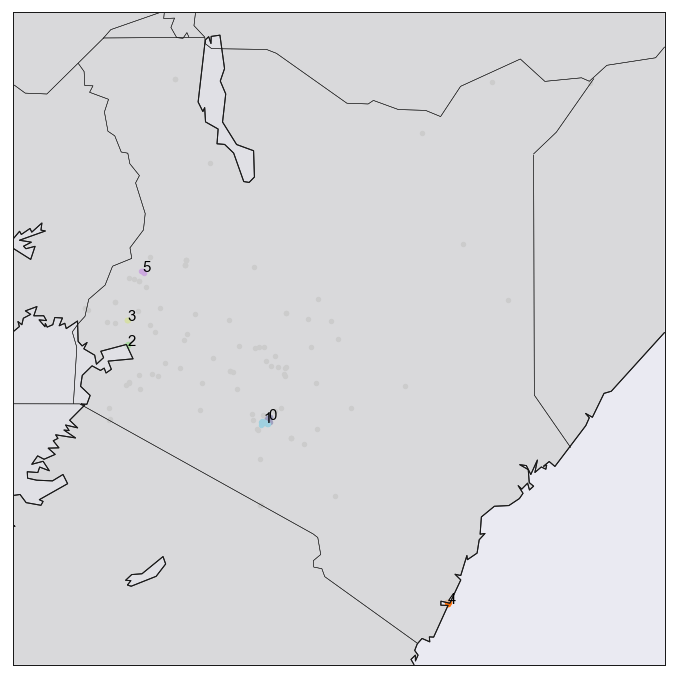

In [52]:
import warnings
warnings.filterwarnings("ignore")
get_map(U900C1)

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Load status,xm,ym,Clus_Db
4,134807,-87.681999,28,50.297883,Huawei,17721_NW_NI4949-Gaberone Street_MWM_U900,17721_NW_NI4949-Gaberone Street_MWM_U900-5,3G,U900-C2,-1.284430,36.826599,NAIROBI WEST,medium load,425498.208208,413847.383063,0
5,93411,-85.706001,28,32.685192,Huawei,16250_NW_NM3718-Kasarani_Zazi_House_SmallCell_SWM,16250_NW_NM5718-Kasarani_Zazi_House_SmallCell_...,3G,U900-C2,-1.217220,36.895599,NAIROBI WEST,low load,433170.681681,421322.580936,0
9,34437,-89.563004,24,73.595417,Huawei,13585_NW_NI2392-Thome_OUTH_MGF,13585_NW_NI4392-Thome_OUTH_U900-4,3G,U900-C2,-1.227900,36.869999,NAIROBI WEST,medium load,430324.044713,420134.740441,0
11,70271,-89.418503,31,65.871253,Huawei,14858_NW_NI4602-Dandora_East_OUTH_MGF,14858_NW_NI4602-Dandora_East_OUTH_U900-6,3G,U900-C2,-1.242330,36.915501,NAIROBI WEST,medium load,435383.601523,418529.833649,0
19,134806,-86.928001,30,43.291688,Huawei,17721_NW_NI4949-Gaberone Street_MWM_U900,17721_NW_NI4949-Gaberone Street_MWM_U900-6,3G,U900-C2,-1.284430,36.826599,NAIROBI WEST,low load,425498.208208,413847.383063,0
21,80930,-88.081001,12,33.771966,Huawei,13791_MK_EC4378-Mukothima_OUTA_MGF_U900,13791_MK_EC4378-Mukothima_OUTA_U900-4,3G,U900-C2,0.000880,37.986099,MT.KENYA,low load,554428.678515,556779.257108,-1
29,143106,-89.905502,12,47.542884,Huawei,14329_NW_NI2152-Kimathi_House_HUB_IBM_SWTOFF,14329_NW_NI4152-Kimathi_House_U900-6,3G,U900-C2,-1.283940,36.823299,NAIROBI WEST,low load,425131.297021,413901.889957,0
30,38106,-87.250999,11,43.076235,Huawei,13611_RV_WU4880-Oljabet_OUTD_MGF,13611_RV_WU4880-Oljabet_OUTD_U900-4,3G,U900-C2,0.162630,36.367699,RIFT,low load,374470.830176,574765.029811,-1
31,49955,-87.681000,35,73.012724,Huawei,12069_NW_NI2069-Dandora_OUTH_MGF,12069_NW_NI4069-Dandora_OUTH_U900-5,3G,U900-C2,-1.246860,36.903599,NAIROBI WEST,medium load,434060.176200,418025.993973,0
32,25980,-87.725494,34,79.760072,Huawei,12326_NW_NM3297-Lineka_HUB_OUTH_MGF,12326_NW_NM5297-Lineka_OUTH_U900-5,3G,U900-C2,-1.182630,36.908001,NAIROBI WEST,medium load,434549.673900,425169.655970,0


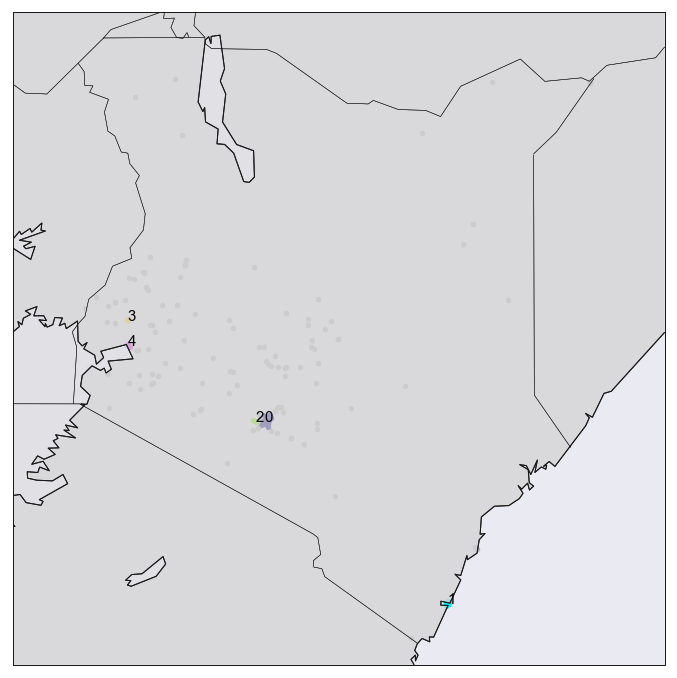

In [53]:
import warnings
warnings.filterwarnings("ignore")
get_map(U900C2)

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Load status,xm,ym,Clus_Db
22,138807,-86.167496,28,30.856347,Huawei,17384_NW_NM3941-Zimmerman_SmallCell_SWM,17384_NW_NM3941-Zimmerman_SmallCell-1,3G,U2100-C1,-1.213800,36.895901,NAIROBI WEST,low load,433204.191489,421702.952476,2
25,1165,-85.392502,34,27.982354,Huawei,15998_NE_NI3218-Data_Center_Sameer_IBS,15998_NE_NI3218-Data_Center_Sameer-0,3G,U2100-C1,-1.328170,36.867001,NAIROBI EAST,low load,429990.643333,408982.464256,-1
39,116244,-82.856003,35,47.959833,Huawei,15980_NW_NI3129-Eastleigh_Social_hall_IBS,15980_NW_NI3129-Eastleigh_Social_hall-0,3G,U2100-C1,-1.276360,36.849400,NAIROBI WEST,low load,428033.500885,414744.948927,0
40,134670,-82.231995,29,74.493889,Huawei,14706_NW_NI2437-Victoria_Court_OUTH_MWM,14706_NW_NI2437-Victoria_Court_OUTH-2,3G,U2100-C1,-1.285060,36.826500,NAIROBI WEST,medium load,425487.179664,413777.310331,0
52,116694,-88.828003,34,38.178776,Huawei,16078_NW_NI3232-Al_Mukaram_Shopping_Mall_IBS,16078_NW_NI3232-Al_Mukaram_Shopping_Mall-0,3G,U2100-C1,-1.274050,36.848202,NAIROBI WEST,low load,427900.310003,415001.876901,0
55,14161,-87.735001,35,38.893079,Huawei,16085_NW_NI3288-Real_Towers_II_IBS,16085_NW_NI3288-Real_Towers_II-0,3G,U2100-C1,-1.303400,36.810699,NAIROBI WEST,low load,423730.247713,411737.476881,0
88,134755,-83.531998,29,48.684338,Huawei,12100_NW_NI2452-Luthuli_Avenue_HUB_OUTH_IBM,12100_NW_NI2452-Luthuli_Avenue_HUB_SmallCell_O...,3G,U2100-C1,-1.284280,36.827801,NAIROBI WEST,low load,425631.823264,413864.075883,0
97,116696,-87.895500,34,40.603857,Huawei,15979_NW_NI3233-Taisir_shopping_mall_IBS,15979_NW_NI3233-Taisir_shopping_mall-0,3G,U2100-C1,-1.274900,36.849300,NAIROBI WEST,low load,428022.472341,414907.342071,0
112,134660,-80.925003,29,62.672661,Huawei,14718_NW_NI2285-Accra_Hotel_MRT,14718_NW_NI2285-Accra_Hotel-0,3G,U2100-C1,-1.283210,36.826599,NAIROBI WEST,medium load,425498.208208,413983.073522,0
121,134813,-69.041000,35,38.762926,Huawei,13628_NW_NI2828-Union_Tower_SmallCell_OUTH_HUB...,13628_NW_NI2828-Union_Tower_SMALL-1,3G,U2100-C1,-1.284280,36.825001,NAIROBI WEST,low load,425320.478974,413864.075883,0


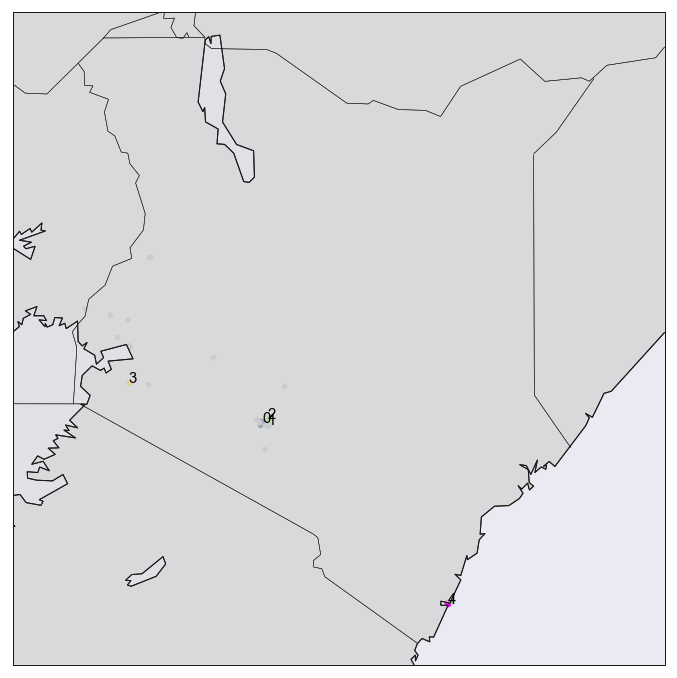

In [54]:
import warnings
warnings.filterwarnings("ignore")
get_map(U2100C1)

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Load status,xm,ym,Clus_Db
12,134705,-88.811501,15,53.148209,Huawei,13628_NW_NI2010-Commonwealth_house_HUB_OUTH_IBM,13628_NW_NI2010-Commonwealth_house_OUTH-6,3G,U2100-C2,-1.284280,36.825001,NAIROBI WEST,medium load,425320.478974,413864.075883,0
15,69270,-88.314499,9,36.671171,Huawei,16019_NW_NM3590-Kasarani_Equity_SmallCell_SRT,16019_NW_NM3590-Kasarani_Equity_SmallCell_SRT-6,3G,U2100-C2,-1.217750,36.900101,NAIROBI WEST,low load,433671.207925,421263.633844,1
16,133129,-83.410004,34,54.175924,Huawei,14716_NW_NI2094-Dubois_Street_Micro_MWM,14716_NW_NI2094-Dubois_Street_Micro-4,3G,U2100-C2,-1.282350,36.826500,NAIROBI WEST,medium load,425487.179664,414078.735655,0
17,116685,-88.522499,34,33.817823,Huawei,16830_NW_NI3302-Mash_Express_Building_IBS,16830_NW_NI3302-Mash_Express_Building-4,3G,U2100-C2,-1.273030,36.847801,NAIROBI WEST,low load,427855.771651,415115.318656,0
27,134814,-86.702499,25,8.555456,Huawei,12117_NW_NI2854-Accra_Trading_Centre_MWM,12117_NW_NI2854-Accra_Trading_Centre-4,3G,U2100-C2,-1.283160,36.827202,NAIROBI WEST,low load,425565.227824,413988.642213,0
33,134752,-87.871506,25,49.450573,Huawei,12100_NW_NI2452-Luthuli_Avenue_HUB_OUTH_IBM,12100_NW_NI2452-Luthuli_Avenue_HUB_SmallCell_O...,3G,U2100-C2,-1.284280,36.827801,NAIROBI WEST,low load,425631.823264,413864.075883,0
41,70637,-89.117996,22,44.691522,Huawei,15996_NE_NI3150-Sameer_Business_Park_IBS,15996_NE_NI3150-Sameer_Business_Park-5,3G,U2100-C2,-1.328230,36.866402,NAIROBI EAST,low load,429924.047893,408975.781708,2
42,134656,-84.544006,28,65.808661,Huawei,14718_NW_NI2285-Accra_Hotel_MRT,14718_NW_NI2285-Accra_Hotel-5,3G,U2100-C2,-1.283210,36.826599,NAIROBI WEST,medium load,425498.208208,413983.073522,0
47,101237,-86.808502,34,59.538010,Huawei,16114_NE_NI3289-EMBAKASI_TRANSAMI_Plot10_ERRU_SET,16114_NE_NI3289-EMBAKASI_TRANSAMI_Plot10_ERRU-6,3G,U2100-C2,-1.321520,36.895000,NAIROBI EAST,medium load,433104.086240,409722.104670,2
50,55396,-88.582504,27,39.647486,Huawei,16085_NW_NI3288-Real_Towers_II_IBS,16085_NW_NI3288-Real_Towers_II-4,3G,U2100-C2,-1.303400,36.810699,NAIROBI WEST,low load,423730.247713,411737.476881,0


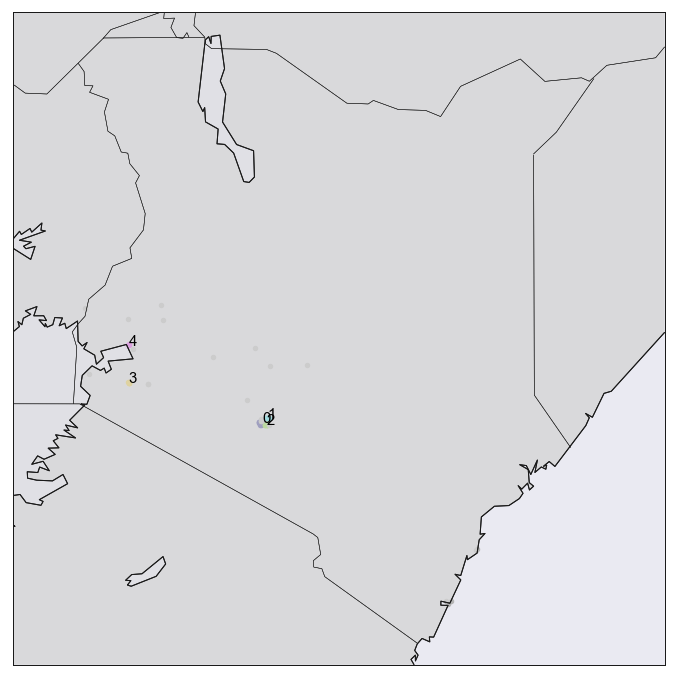

In [55]:
import warnings
warnings.filterwarnings("ignore")
get_map(U2100C2)

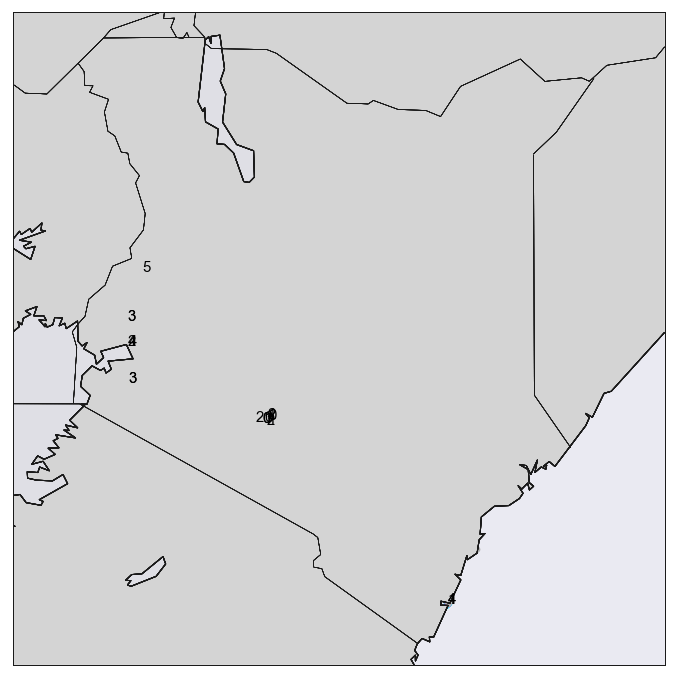

In [56]:
U900C1_clusters=get_map(U900C1)
U900C2_clusters=get_map(U900C2)
U2100C1_clusters=get_map(U2100C1)
U2100C2_clusters=get_map(U2100C2)

In [57]:
final=U900C1_clusters.append([U900C2_clusters,U2100C1_clusters,U2100C2_clusters])

In [58]:
final.shape

(736, 16)

In [59]:
final.sample(10)

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Load status,xm,ym,Clus_Db
683,55567,-87.735001,23,68.517921,Huawei,13750_NW_NI2451-KTDA_Plaza_MWM,13750_NW_NI2451-KTDA_Plaza-5,3G,U2100-C2,-1.286560,36.826801,NAIROBI WEST,medium load,425520.689471,413610.474843,0
77,116697,-87.323502,35,35.343972,Huawei,15977_NW_NI3230-Tokyo_Shopping_Mall_IBS,15977_NW_NI3230-Tokyo_Shopping_Mall-4,3G,U2100-C2,-1.275130,36.848900,NAIROBI WEST,low load,427977.933989,414881.752693,0
802,25595,-88.477448,18,72.631702,Nokia,12840_WN_WN2013-Kisumu_Exchange_MGF,12840_WN_WN4013-Kisumu_Exchange_UMTS900-5,3G,U900-C2,-0.103277,34.753300,GREATER WESTERN,medium load,194957.941185,545197.503376,4
297,36276,-89.089996,34,33.361672,Huawei,17120_NW_NI3709-Tiara_Office_Park_IBS,17120_NW_NI3709-Tiara_Office_Park-2,3G,U2100-C1,-1.280490,36.770802,NAIROBI WEST,low load,419293.803659,414285.599106,-1
791,92025,-79.400011,26,50.853927,Nokia,12977_WN_WN4109-EATON_Lunza_OUTL_MGF,12977_WN_WN4109-EATON_Lunza_OUTL_U900-6,3G,U900-C2,0.233360,34.556301,GREATER WESTERN,medium load,173052.707048,582629.890810,-1
429,3516,-87.022003,5,35.827081,Huawei,12167_NW_NI2210-Femnet_OUTH_IBM,12167_NW_NI4210-Femnet_OUTH_U900-5,3G,U900-C2,-1.272020,36.809399,NAIROBI WEST,low load,423585.604112,415227.659891,0
47,101237,-86.808502,34,59.538010,Huawei,16114_NE_NI3289-EMBAKASI_TRANSAMI_Plot10_ERRU_SET,16114_NE_NI3289-EMBAKASI_TRANSAMI_Plot10_ERRU-6,3G,U2100-C2,-1.321520,36.895000,NAIROBI EAST,medium load,433104.086240,409722.104670,2
904,42028,-82.657811,7,57.395248,Nokia,12842_WN_WN2015-Kisumu_Old_Town_MGF,12842_WN_WN2015-KisumuOldTown-5,3G,U2100-C2,-0.096206,34.756001,GREATER WESTERN,medium load,195258.256932,545983.763064,4
545,98005,-80.024994,34,26.376755,Huawei,12935_RV_WU4868-Tot_OUTN_MGF_U900,12935_RV_WU4868-Tot_OUTN_MGF_U900-2,3G,U900-C1,1.201890,35.656300,RIFT,low load,295366.899091,690335.191269,-1
643,101238,-89.598503,10,68.538552,Huawei,16114_NE_NI3289-EMBAKASI_TRANSAMI_Plot10_ERRU_SET,16114_NE_NI3289-EMBAKASI_TRANSAMI_Plot10_ERRU-5,3G,U2100-C2,-1.321520,36.895000,NAIROBI EAST,medium load,433104.086240,409722.104670,2


In [60]:
external1=final[~final['Clus_Db']==-1]

In [61]:
internal1=final[final['Clus_Db']==-1]

In [62]:
internal1['New_column']=internal1['Cell_name'].str[-1:].replace({'4':'0', '5':'1','6':'2'})

In [63]:
internal1['New_column'].head()

1     1
6     1
13    1
14    2
23    1
Name: New_column, dtype: object

In [64]:
internal1['New_column']=internal1['Cell_name'].str[-2:].replace({'-4':'-0', '-5':'-1','-6':'-2'})
internal1.loc[:,'New_column']=internal1['Site_Name']+ internal1['New_column']
internal1['New_column'].head()

1             14020_RV_WN2158-Kapsabet_CBD_OUTL_MWM-1
6                  12620_MK_EC4165-Kangeta_OUTA_MGF-1
13          16502_NW_NM5470-Kirigiti_South_OUTH_MGF-1
14                     13794_NE_EL5146-Mui_OUTE_MGF-2
23    12672_RV_WL3203-Cool_Shade_Hotel_OUTD_HUB_MGF-1
Name: New_column, dtype: object

In [65]:
ids = internal1["New_column"]
maintenance=internal1[ids.isin(ids[ids.duplicated()])]

In [66]:
maintenance=maintenance.sort_values('Cell_name', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [67]:
maintenance.shape

(144, 17)

In [68]:
internal1.shape

(272, 17)

In [69]:
def difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    comparison_df = df1.merge(df2,
                              indicator=True,
                              how='outer')
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    #diff_df.to_csv('data/diff.csv')
    return diff_df

In [70]:
diff_df=difference(internal1,maintenance)

In [71]:
diff_df.sample(10)

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Load status,xm,ym,Clus_Db,New_column,_merge
247,16630,-87.651664,2,77.398838,Nokia,13810_WN_WN2190-Ambwere_Plaza_OUTL_MRT,13810_WN_WN2190-AmbwerePlaza-1,3G,U2100-C1,0.282800,34.751598,GREATER WESTERN,medium load,194768.759232,588127.419287,-1,13810_WN_WN2190-Ambwere_Plaza_OUTL_MRT-1,left_only
146,24269,-88.167999,12,59.090904,Huawei,16302_RV_WU5252-Kapkoi_Kitany_OUTD_MGF,16302_RV_WU5252-Kapkoi_Kitany_OUTD_U900-5,3G,U900-C2,0.521167,35.509499,RIFT,medium load,279043.380921,614633.278383,-1,16302_RV_WU5252-Kapkoi_Kitany_OUTD_MGF-1,left_only
87,30847,-84.340185,1,78.994482,Nokia,14450_WN_WN4173-Mbwekas_MGF_U900,14450_WN_WN4173-Mbwekas_UMTS900-1,3G,U900-C1,0.439889,34.149399,GREATER WESTERN,medium load,127807.255482,605595.266501,-1,14450_WN_WN4173-Mbwekas_MGF_U900-1,left_only
246,120116,-78.613600,1,68.029712,Nokia,15716_RV_WU5242-Telkom_Kapenguria_UMTS900_MGF,15716_RV_WU3242-Telkom_Kapenguria_MGF-2,3G,U2100-C1,1.255920,35.092400,RIFT,medium load,232664.110160,696344.439488,-1,15716_RV_WU5242-Telkom_Kapenguria_UMTS900_MGF-2,left_only
227,95487,-88.691002,32,79.695344,Huawei,16124_MK_EC4787-EATON_Muranga_Mjini_OUTA_MGF,16124_MK_EC2787-EATON_Muranga_Mjini_OUTA-1,3G,U2100-C1,-0.727969,37.155701,MT.KENYA,medium load,462092.615077,475732.784034,-1,16124_MK_EC4787-EATON_Muranga_Mjini_OUTA_MGF-1,left_only
185,46670,-87.816783,29,73.657378,Nokia,12815_RV_NO3017-Narok_Nyawira_street_OUTN_MGF,12815_RV_NO5017-Narok_Nyawira_street_OUTN_U900-6,3G,U900-C2,-1.087360,35.875500,RIFT,medium load,319740.830465,435765.262651,-1,12815_RV_NO3017-Narok_Nyawira_street_OUTN_MGF-2,left_only
10,137920,-89.192001,1,63.514011,Huawei,12225_NE_NM3271-Ole_Pere_OUTE_MGF,12225_NE_NM5271-Ole_Pere_OUTE_U900-2,3G,U900-C1,-1.397610,36.753899,NAIROBI EAST,medium load,417414.285196,401258.905952,-1,12225_NE_NM3271-Ole_Pere_OUTE_MGF-2,left_only
124,114427,-89.688507,15,27.933611,Huawei,15836_NE_NM3539-Hardy_MGF,15836_NE_NM5539-Hardy_MGF_U900-4,3G,U900-C2,-1.366810,36.753601,NAIROBI EAST,low load,417381.199563,404684.703259,-1,15836_NE_NM3539-Hardy_MGF-0,left_only
138,2332,-84.054504,9,38.205941,Huawei,12816_RV_WU4854-Kapsowar_OUTD_MGF,12816_RV_WU4854-Kapsowar_OUTD_U900-6,3G,U900-C2,0.951630,35.566601,RIFT,low load,285392.853246,662502.625631,-1,12816_RV_WU4854-Kapsowar_OUTD_MGF-2,left_only
52,137821,-84.463501,3,39.579880,Huawei,14646_NE_NM3221-Ongata_Rongai_Mithika_OUTE_MGF,14646_NE_NM5221-Ongata_Rongai_Mithika_OUTE_U900-1,3G,U900-C1,-1.392080,36.744598,NAIROBI EAST,low load,416380.147075,401873.995839,-1,14646_NE_NM3221-Ongata_Rongai_Mithika_OUTE_MGF-1,left_only


In [74]:
Lamp.rename(columns={"Load status": "Status"}, inplace=True)
IBS.rename(columns={"Load status": "Status"}, inplace=True)

In [75]:
load.rename(columns={"Load status": "Status"}, inplace=True)

In [76]:
load.columns

Index(['did', 'RTWP', 'Days', 'TCPload', 'Vendor', 'Site_Name', 'Cell_name',
       'Technology', 'BAND', 'LATITUDE', 'LONGITUDE', 'Region', 'Status'],
      dtype='object')

In [77]:
diff_df['Status']='External'

In [78]:
diff_df=diff_df[['did', 'RTWP', 'Days', 'TCPload', 'Vendor', 'Site_Name', 'Cell_name',
       'Technology', 'BAND', 'LATITUDE', 'LONGITUDE', 'Region', 'Status']]

In [79]:
diff_df.head()

,did,RTWP,Days,TCPload,Vendor,Site_Name,Cell_name,Technology,BAND,LATITUDE,LONGITUDE,Region,Status
2,67609,-87.999001,8,54.009089,Huawei,16502_NW_NM5470-Kirigiti_South_OUTH_MGF,16502_NW_NM5470-Kirigiti_South_OUTH_U900-1,3G,U900-C1,-1.175910,36.840900,NAIROBI WEST,External
10,137920,-89.192001,1,63.514011,Huawei,12225_NE_NM3271-Ole_Pere_OUTE_MGF,12225_NE_NM5271-Ole_Pere_OUTE_U900-2,3G,U900-C1,-1.397610,36.753899,NAIROBI EAST,External
11,58982,-89.069000,29,75.887318,Huawei,13397_NW_NM5546-Telkom_Kabuku_OUTH_MGF,13397_NW_NM5546-Telkom_Kabuku_OUTH_U900-1,3G,U900-C1,-1.152120,36.668598,NAIROBI WEST,External
15,86092,-86.173996,23,37.602277,Huawei,13687_RV_WL5391-Segeon_OUTD_MGF_U900,13687_RV_WL5391-Segeon_OUTD_MGF_U900-0,3G,U900-C1,0.067264,35.664101,RIFT,External
23,25055,-88.717499,8,67.642603,Huawei,14996_RV_WU3046-Eldoret_Showground_OUTD_MGF,14996_RV_WU5046-Eldoret_Showground_OUTD_U900-2,3G,U900-C1,0.471500,35.260502,RIFT,External


In [80]:
maintenance['Status']='Maintenance'

In [81]:
maintenance=maintenance[['did', 'RTWP', 'Days', 'TCPload', 'Vendor', 'Site_Name', 'Cell_name',
       'Technology', 'BAND', 'LATITUDE', 'LONGITUDE', 'Region', 'Status']]

In [82]:
external1['Status']='External'

In [83]:
external1=external1[['did', 'RTWP', 'Days', 'TCPload', 'Vendor', 'Site_Name', 'Cell_name',
       'Technology', 'BAND', 'LATITUDE', 'LONGITUDE', 'Region', 'Status']]

In [108]:
Output=diff_df.append([load,maintenance,external1,diff_df,Lamp,IBS])

In [120]:
Output.drop_duplicates(subset=None, keep='first',inplace=True)
Output.shape

(999, 13)

In [121]:
import pyodbc
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 13 for SQL Server};'+
  "SERVER=172.29.128.126; port=1433;"
     "DATABASE=LAB_Maureen;"
    "trusted_connection=yes;"
          "Uid=auth_window"
  )
cursor = conn.cursor()

cursor.execute("TRUNCATE TABLE RTWP")

OperationalError: ('08S01', '[08S01] [Microsoft][ODBC Driver 13 for SQL Server]TCP Provider: An existing connection was forcibly closed by the remote host.\r\n (10054) (SQLExecDirectW); [08S01] [Microsoft][ODBC Driver 13 for SQL Server]Communication link failure (10054)')

In [ ]:
'''mycursor = conn.cursor()
mycursor.execute("ALTER TABLE dbo.RTWP ALTER COLUMN [Site_Name] VARCHAR(150);")
mycursor.execute("ALTER TABLE dbo.RTWP ALTER COLUMN [Cell_Name] VARCHAR(150);")
conn.commit()'''

In [ ]:
cursor=conn.cursor()
for index, row in Output.iterrows():
    cursor.execute(" Insert into dbo.RTWP([did], [RTWP], [Days], [TCP_load], [Vendor], [Site_Name], [Cell_name],[Technology], [BAND], [LATITUDE], [LONGITUDE], [Region], [Status]) values(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", row['did'],row['RTWP'],row['Days'],row['TCPload'],row['Vendor'],row['Site_Name'],row['Cell_name'],row['Technology'],row['BAND'],row['LATITUDE'],row['LONGITUDE'],row['Region'],row['Status'])
    conn.commit()
cursor.close()
conn.close()

In [ ]:
cursor = connStr.cursor()

for index,row in df.iterrows():
    cursor.execute("INSERT INTO dbo.vSalesPerson_test([BusinessEntityID],[FirstName],[LastName]) values (?, ?,?)", row['BusinessEntityID'], row['FirstName'] , row['LastName']) 
    connStr.commit()
cursor.close()
connStr.close()

In [ ]:
output.write_sql_query("ALTER TABLE alarms_test ADD Instruction VARCHAR(500);",conn)

In [ ]:
from sqlalchemy import create_engine
engine=create_engine('msql+pyodbc')

In [ ]:
import pymysql
host='172.29.128.126'
database='LAB_Maureen'
port='1433'
user='root'
passwd=''
conn=pymysql.connect(host=host,
                    port=port,
                    db=database,
                    user=user,
                    password=passwd,)

In [ ]:
mycur = conn.cursor() 
mycur.execute("show tables;")
available_table=(mycur.fetchall())

In [ ]:
from pandas.io import sql
import MySQLdb

In [ ]:
import pyodbc
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 13 for SQL Server};'+
  "SERVER=172.29.128.126; port=1433;"
     "DATABASE=LAB_Maureen;"
    "trusted_connection=yes;"
          "Uid=auth_window"
  )

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import urllib

params = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};SERVER=172.29.128.126;DATABASE=LAB_Maureen;Uid=auth_window;trusted_connection=yes;")
engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

#test = pd.DataFrame({'col1':1, 'col2':'test', 'col3':10}, index=[0])
con=engine.connect().connection
#test.to_sql("dbo.test", con=conn, if_exists="append", index=False)
Output.to_sql('dbo.RTWP',con=con,if_exists='replace', index=False)                           

In [ ]:
Output.to_sql(con=conn,name='RTWP',if_exists='replace', index=False)